In [1]:
import numpy as np
#import scanpy.api as sc
import scanpy as sc
import pandas as pd
import os
import pandas as pd

/home/ggj/anaconda3/envs/py36/lib/python3.6/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}

Bad key "text.kerning_factor" on line 4 in
/home/ggj/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
os.chdir("./Hydra")

In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)\n",
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=200, frameon=False)

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.7.4
backcall            0.2.0
cairo               1.16.3
cffi                1.11.5
cloudpickle         1.5.0
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                1.0.0
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                2.10.0
icu                 2.0.5
igraph              0.7.1
importlib_metadata  1.7.0
ipykernel           5.3.4
ipython_genutils    0.2.0
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.1
llvmlite            0.31.0
louvain             0.6.1
matplotlib          2.2.2
mkl                 2.3.0
mpl_toolkits        NA
natsort             7.0.1
numba               0.47.0
numexpr             2.7.0
numpy               1.19.1
packaging           20.4
pandas              0.25.3
parso               0.7.

In [4]:
import pyreadr
result=pyreadr.read_r("./Hydra/data.RData")

In [5]:
datause=result['dge']
anno=result['anno']
hvg=result['hvg']
gene=result['gene']

In [11]:
datause.index=gene['gene']

In [23]:
adata

AnnData object with n_obs × n_vars = 25052 × 1071
    obs: 'n_genes', 'n_counts'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [15]:
adata=sc.AnnData(datause.T)
adata

AnnData object with n_obs × n_vars = 25052 × 33391

In [16]:
sc.pp.filter_genes(adata, min_cells=0)
sc.pp.filter_cells(adata, min_genes=0)
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [17]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata

normalizing by total count per cell
    finished (0:00:04): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [18]:
adata = adata[:, hvg['hvg']]

In [19]:
sc.pp.regress_out(adata, ['n_counts'])

## scale the data
sc.pp.scale(adata, max_value=10)

regressing out ['n_counts']
    finished (0:00:25)


computing PCA
    with n_comps=40
    finished (0:00:02)


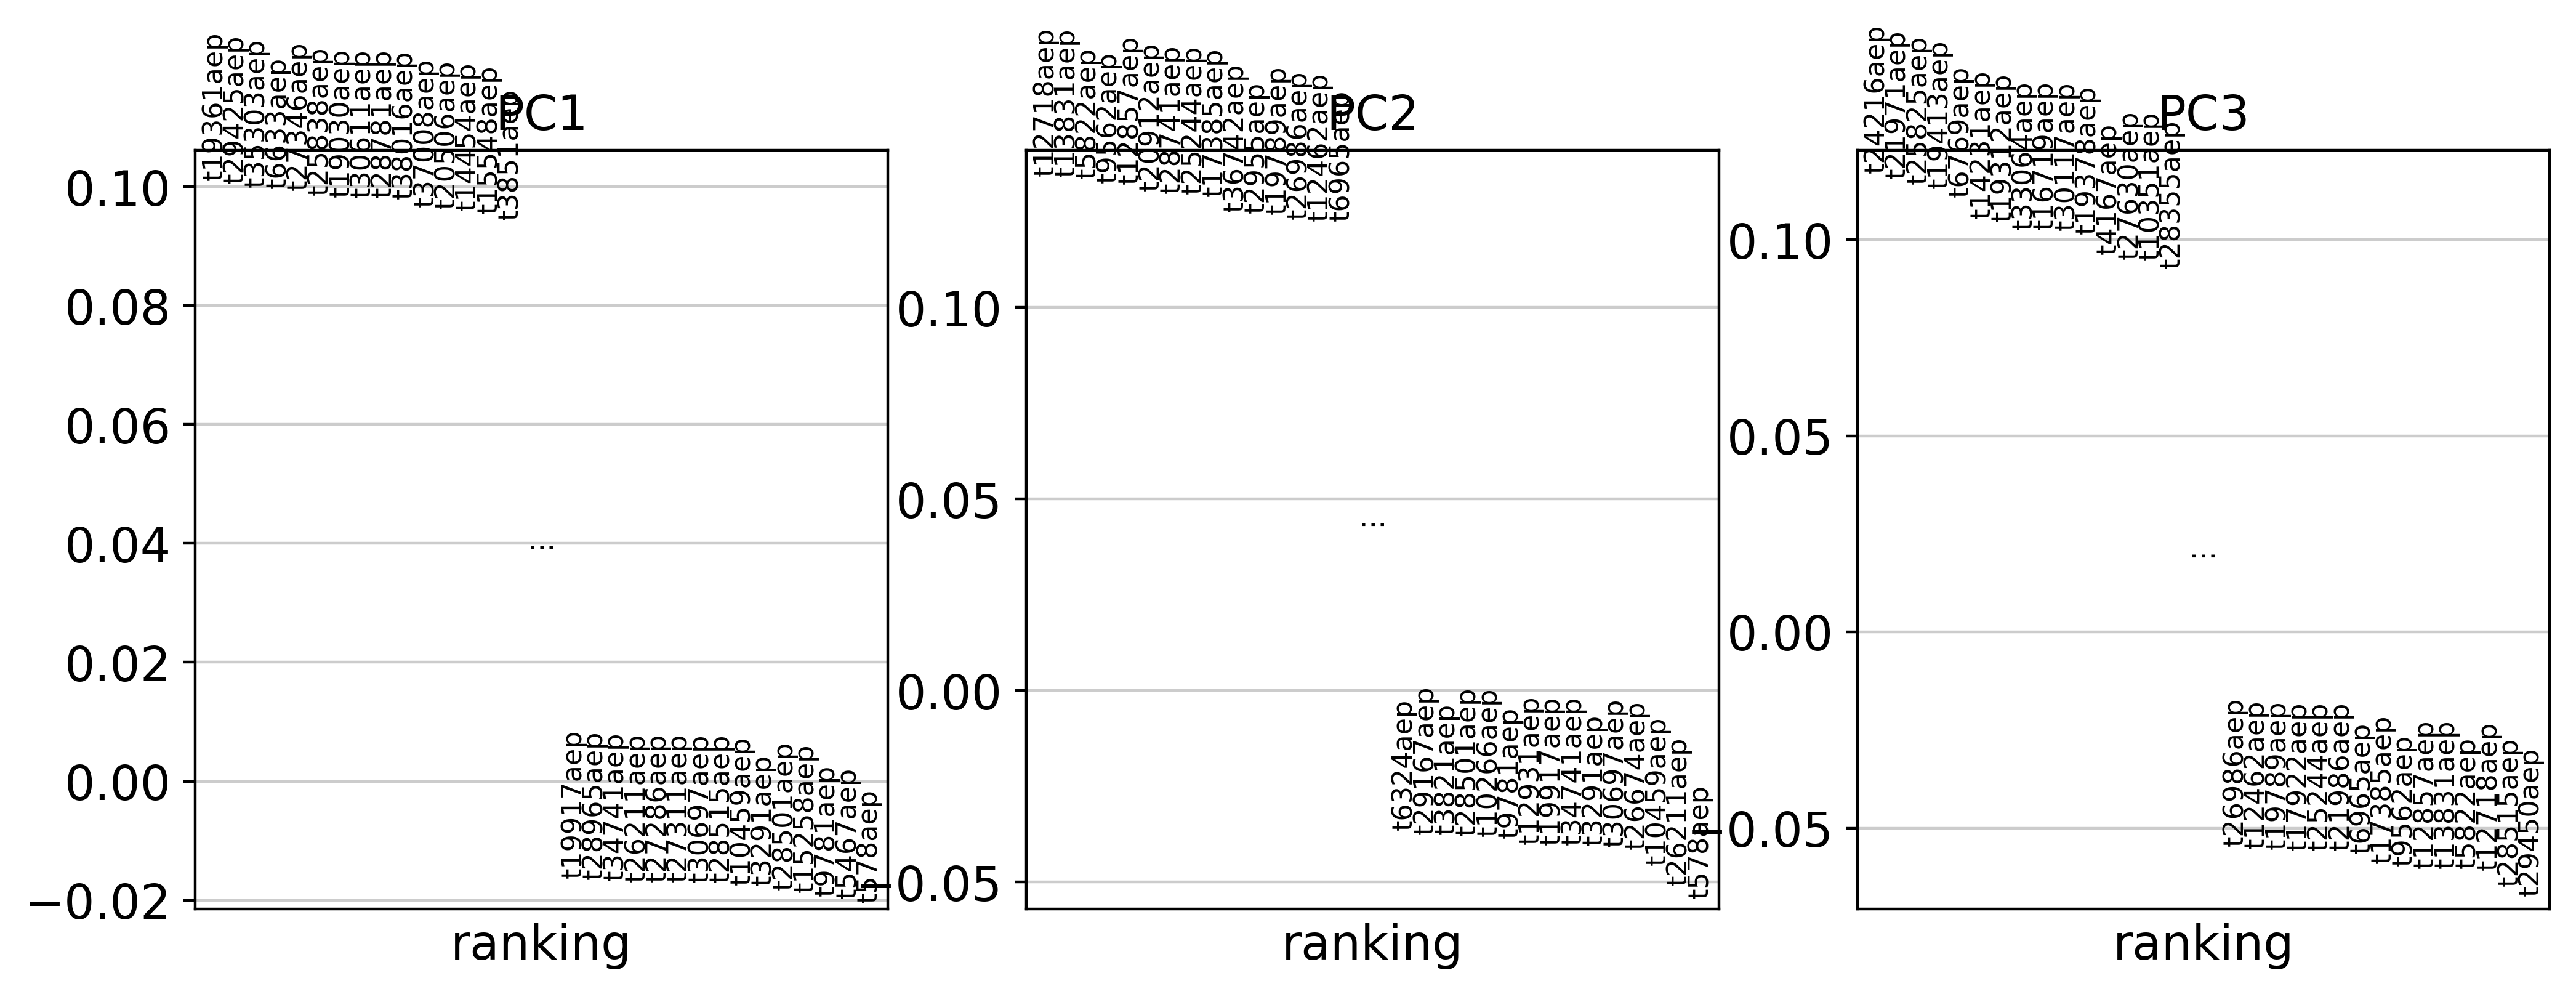

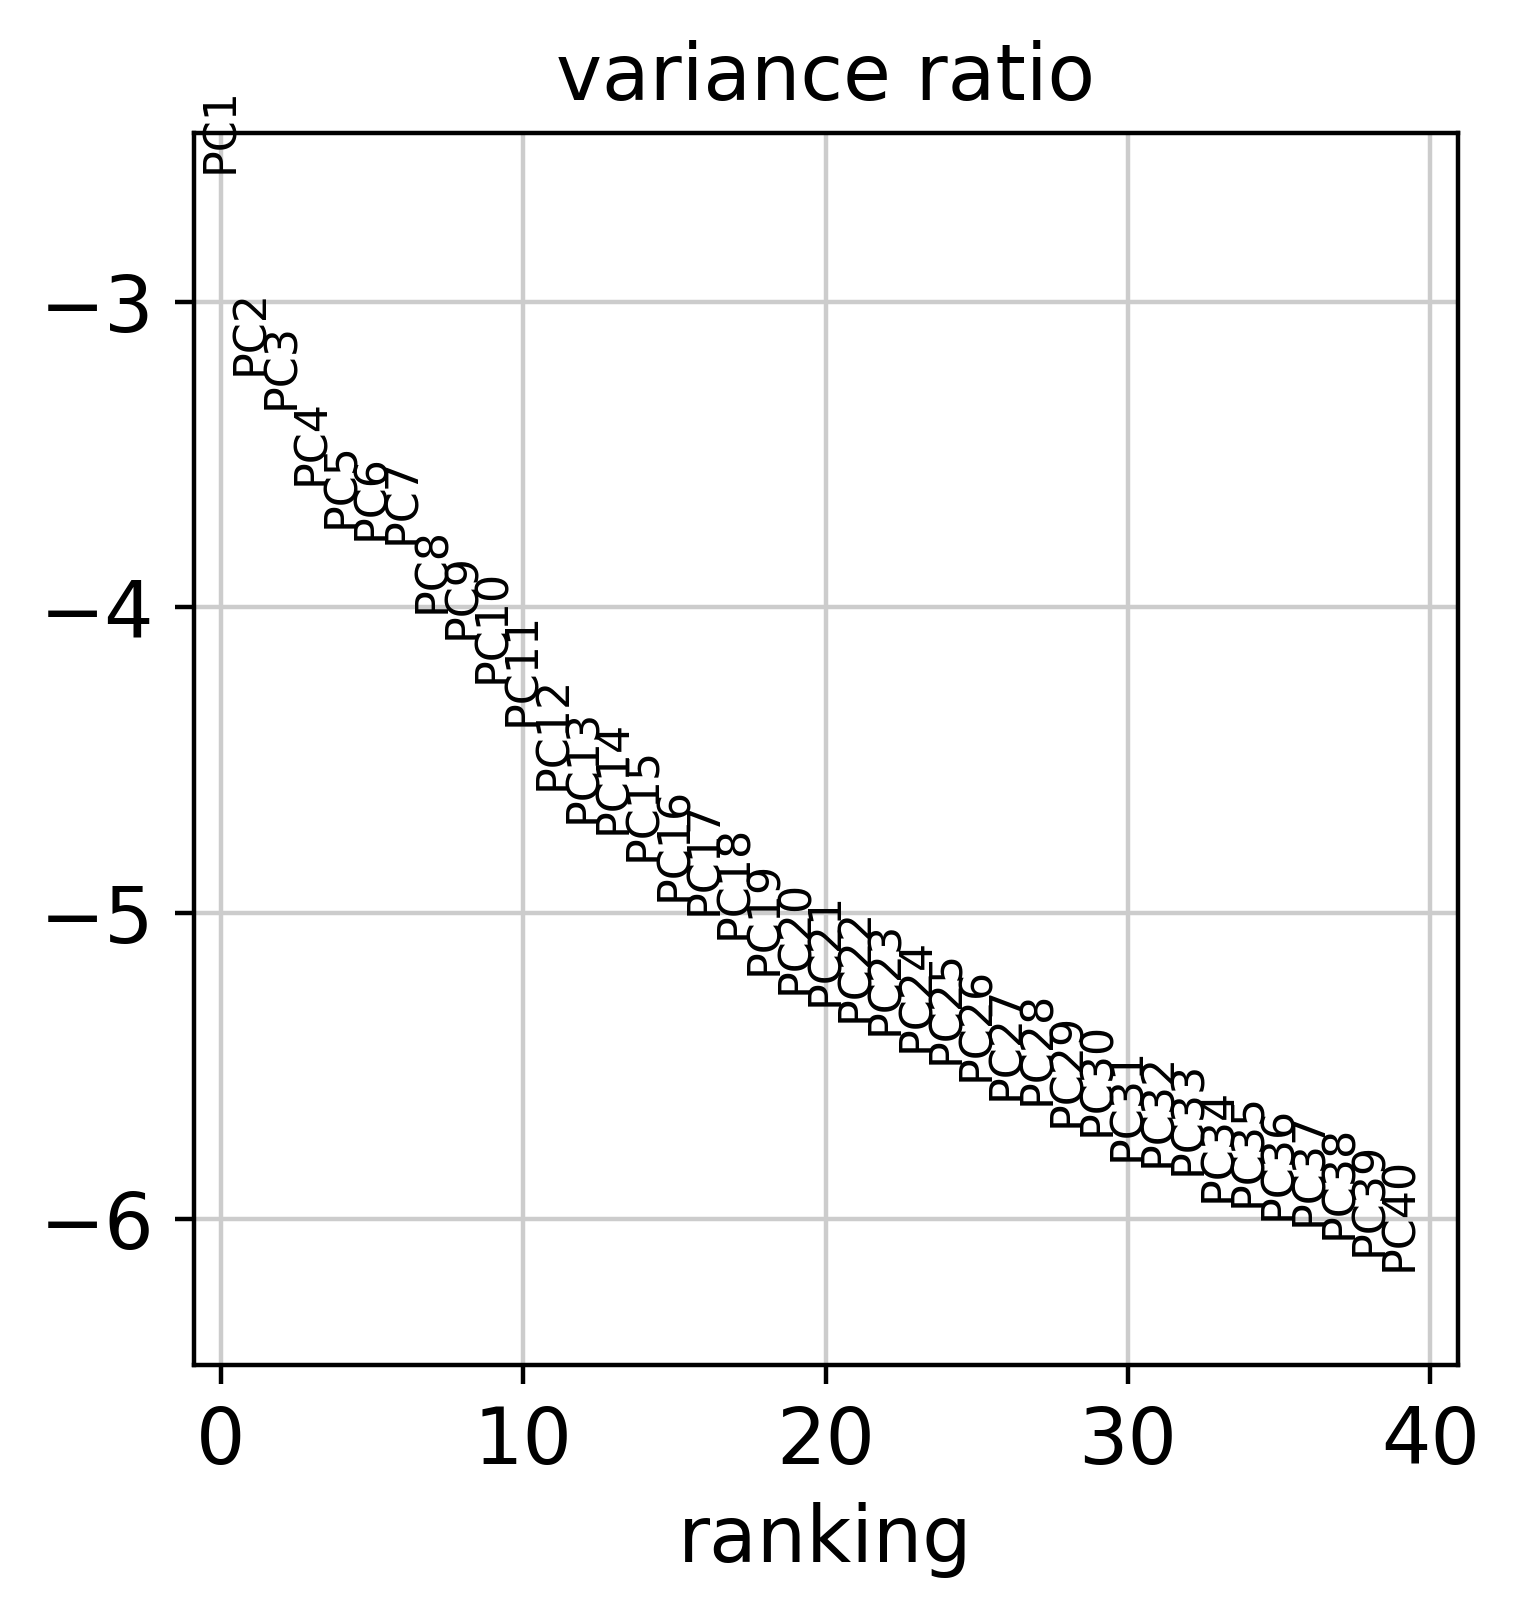

AnnData object with n_obs × n_vars = 25052 × 1071
    obs: 'n_genes', 'n_counts'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [24]:
### PCA
sc.tl.pca(adata, n_comps=40)
sc.pl.pca_loadings(adata)
# visualize
adata.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
#sc.pl.pca_scatter(adata, color='Bex3')
# PC
sc.pl.pca_variance_ratio(adata, log=True,  show=40,n_pcs=40)
## 40,35
adata


In [33]:
sc.pp.neighbors(adata,n_pcs=31)
sc.tl.louvain(adata, resolution=2)

computing neighbors
    using 'X_pca' with n_pcs = 31
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 44 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:03)


In [41]:
adata.obs["cluster.short"]=anno["cluster.short"].values
adata.obs["cluster.long.portal"]=anno["cluster.long.portal"].values
adata.obs["cluster.manuscript"]=anno["cluster.manuscript"].values
adata.obs["cluster_numbering"]=anno["cluster_numbering"].values


In [43]:
adata.obs

,n_genes,n_counts,louvain,cluster.short,cluster.long.portal,cluster.manuscript,cluster_numbering
01-D1_GCGCCCCATGAA,4469,23245.0,18,i_mgl,i_male_germline,i_male_germline,19
01-P2_CGGCCTTGGCGT,3679,12671.0,18,i_mgl,i_male_germline,i_male_germline,19
01-P2_TAATGTCATTTA,3487,10318.0,18,i_mgl,i_male_germline,i_male_germline,19
01-P2_TTTCCTTTATAC,3508,10116.0,18,i_mgl,i_male_germline,i_male_germline,19
01-P2_CGCGACACGGAN,3226,8734.0,18,i_mgl,i_male_germline,i_male_germline,19
...,...,...,...,...,...,...,...
12-N2_ACGCTGACGGGA,344,570.0,33,i_n_en1,i_neuron_en1,i_neuron_en1,30
12-N2_GGAAAGGTTTTA,380,607.0,33,i_n_en1,i_neuron_en1,i_neuron_en1,30
12-N2_AAGGGGGCGGCG,360,657.0,33,i_n_en1,i_neuron_en1,i_neuron_en1,30
12-N2_GGGTCGCCGTGC,343,532.0,33,i_n_en1,i_neuron_en1,i_neuron_en1,30


In [44]:
adata.obs['cluster.short']=adata.obs['cluster.short'].astype('category')

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:27)


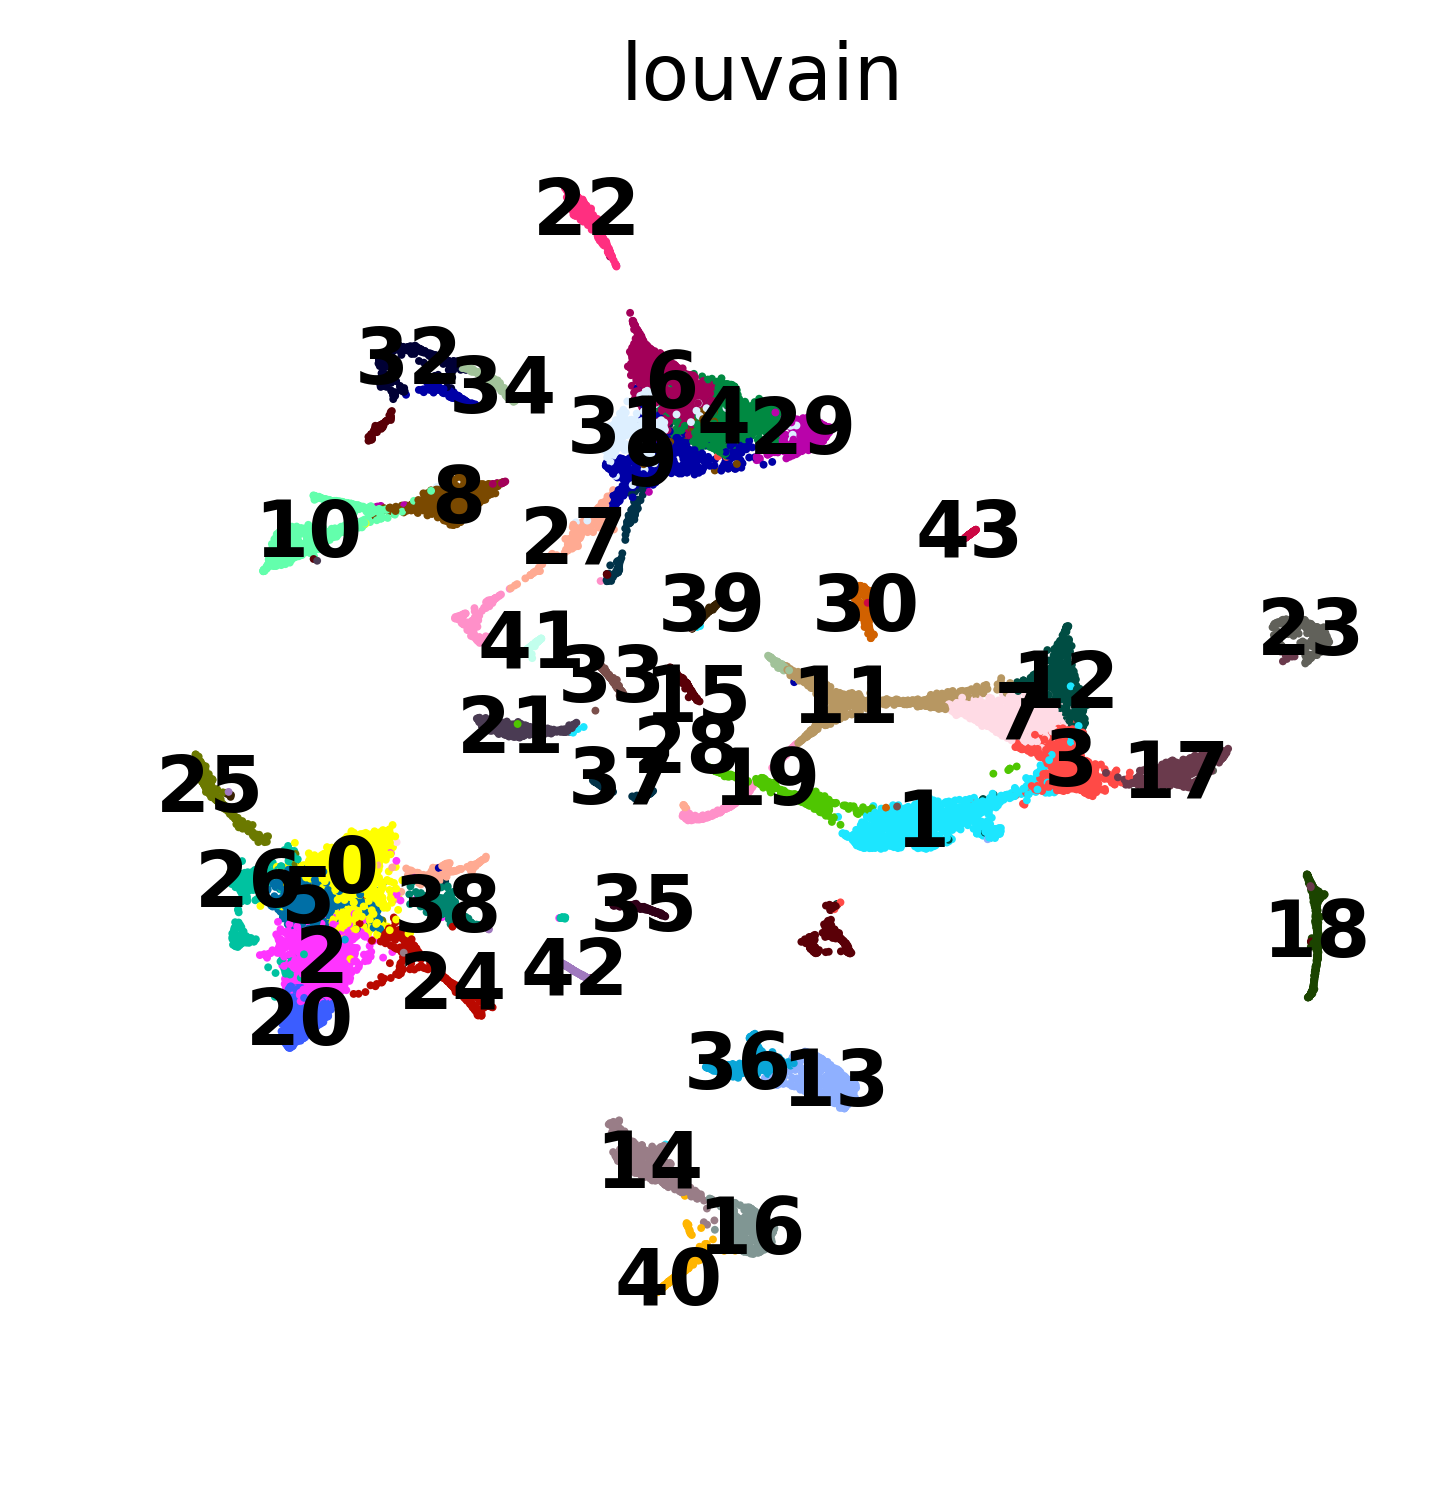

In [34]:
sc.tl.umap(adata, min_dist=0.1)
#sc.pl.umap(adata, color='sample',size=8,legend_loc="on data")


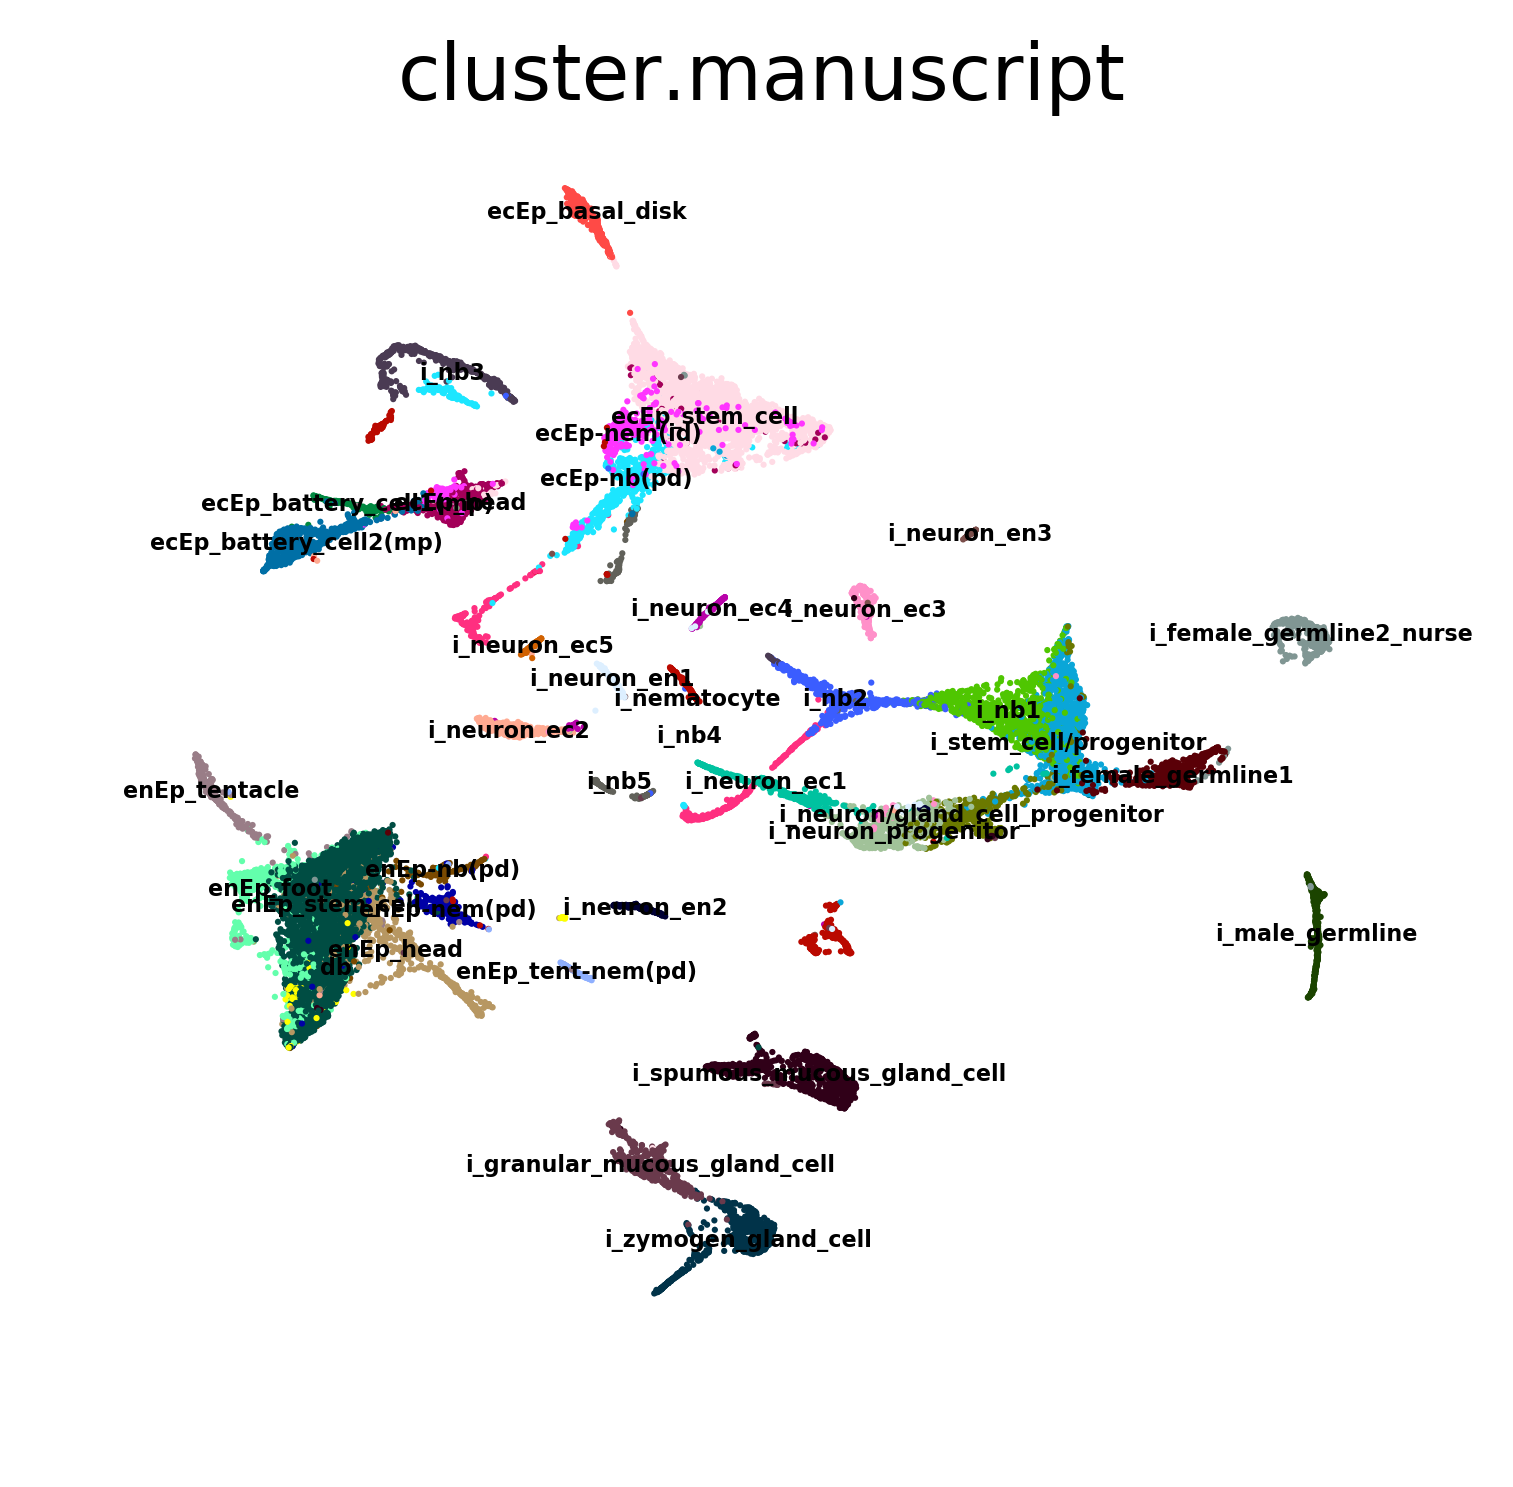

In [51]:
sc.pl.umap(adata, color='cluster.manuscript',size=5,legend_loc="on data",legend_fontsize=4)


## subset three layers to get the relationship 

In [189]:
adata.obs['lineages']=pd.read_csv("lineages.csv",header=None)[1].values

### intestinal 

In [210]:
adata_in=adata[adata.obs["lineages"]=='interstitial']

In [211]:
sc.pp.neighbors(adata_in, n_neighbors=20)
sc.tl.paga(adata_in, groups='cluster.long.portal', model='v1.0')

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


... storing 'lineages' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


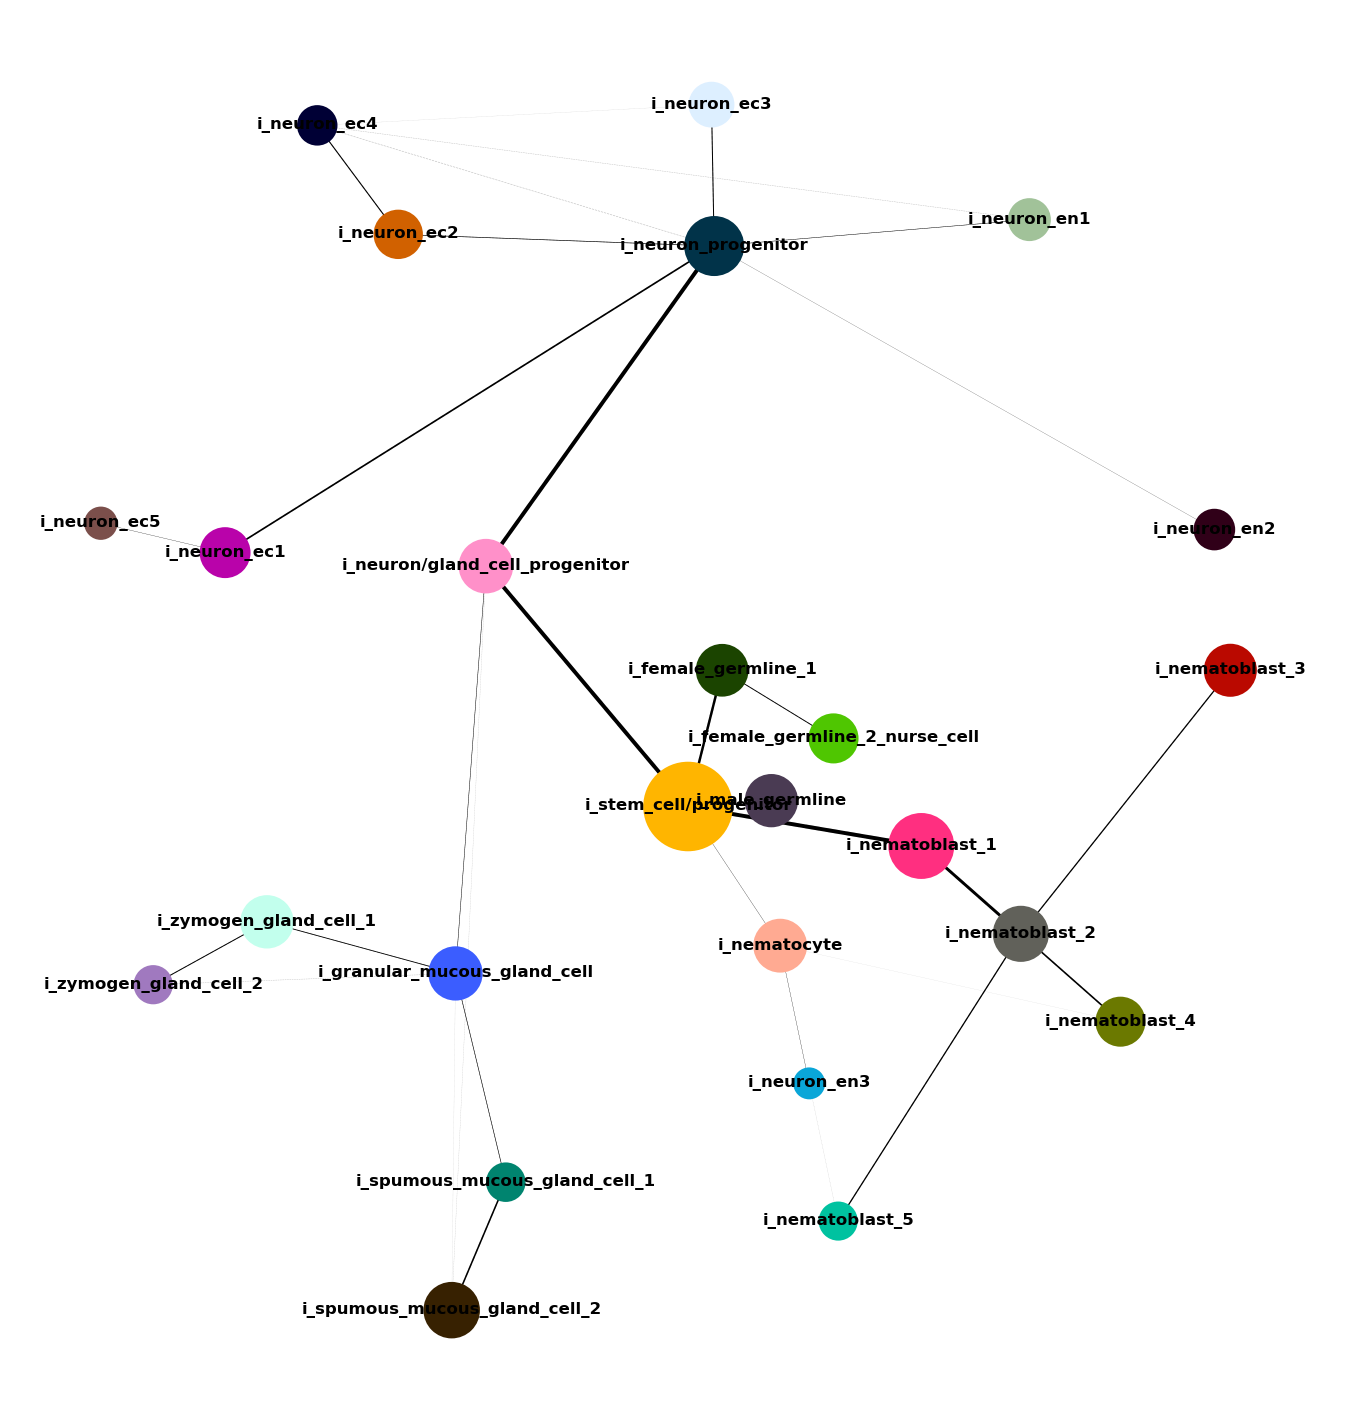

In [225]:
sc.pl.paga(adata_in,
    threshold=0.0035,           
    solid_edges='connectivities_tree',
    dashed_edges='connectivities', 

    layout='rt_circular',
    node_size_scale=0.5,
    node_size_power=0.9,
    edge_width_scale=1,
    max_edge_width=0.7,
    fontsize=3,save="intestinal.pdf")

### ectoderm

In [227]:
adata_ec=adata[adata.obs["lineages"]=='ectoderm']

In [228]:
sc.pp.neighbors(adata_ec, n_neighbors=20)
sc.tl.paga(adata_ec, groups='cluster.long.portal', model='v1.0')

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


... storing 'lineages' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


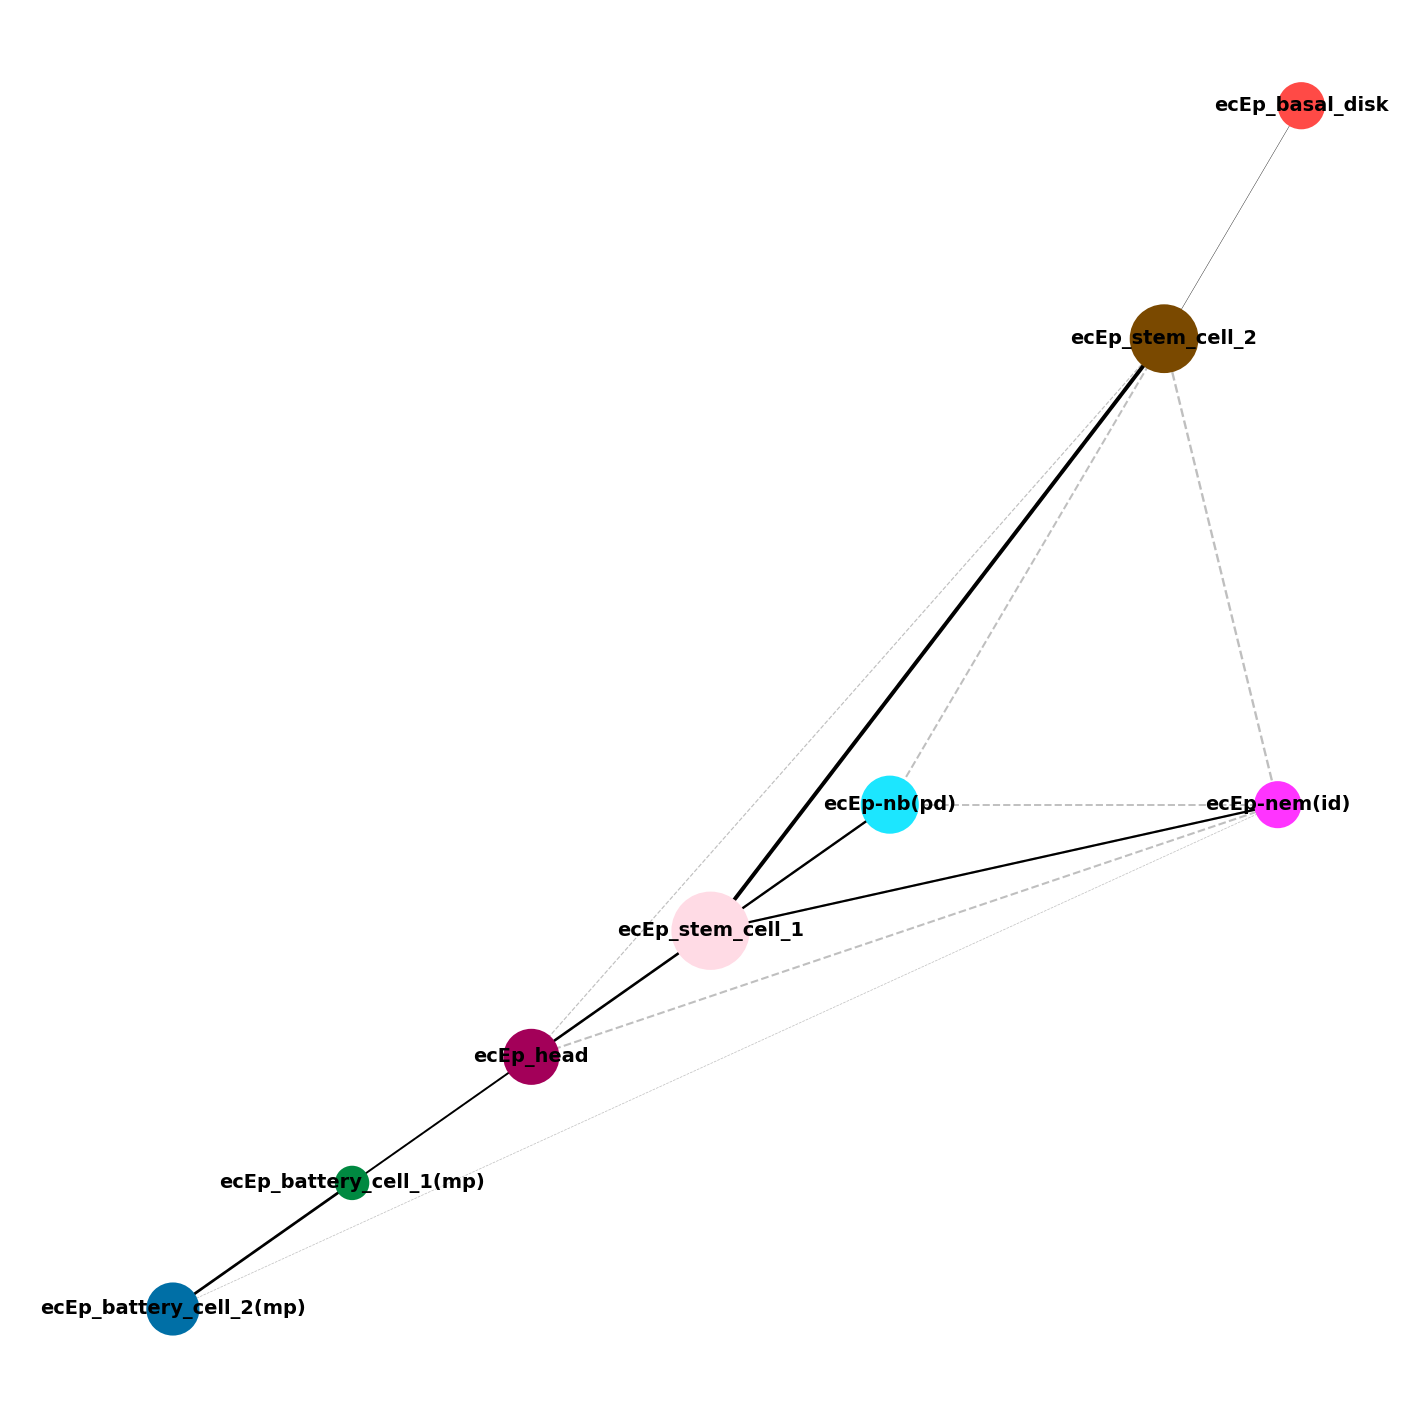

In [229]:
sc.pl.paga(adata_ec,
    threshold=0.005,           
    solid_edges='connectivities_tree',
    dashed_edges='connectivities', 

    layout='rt_circular',
    node_size_scale=0.5,
    node_size_power=0.9,
    edge_width_scale=1,
    max_edge_width=0.7,
    fontsize=3.5,save="ectoderm.pdf")

### endoderm

--> added 'pos', the PAGA positions (adata.uns['paga'])


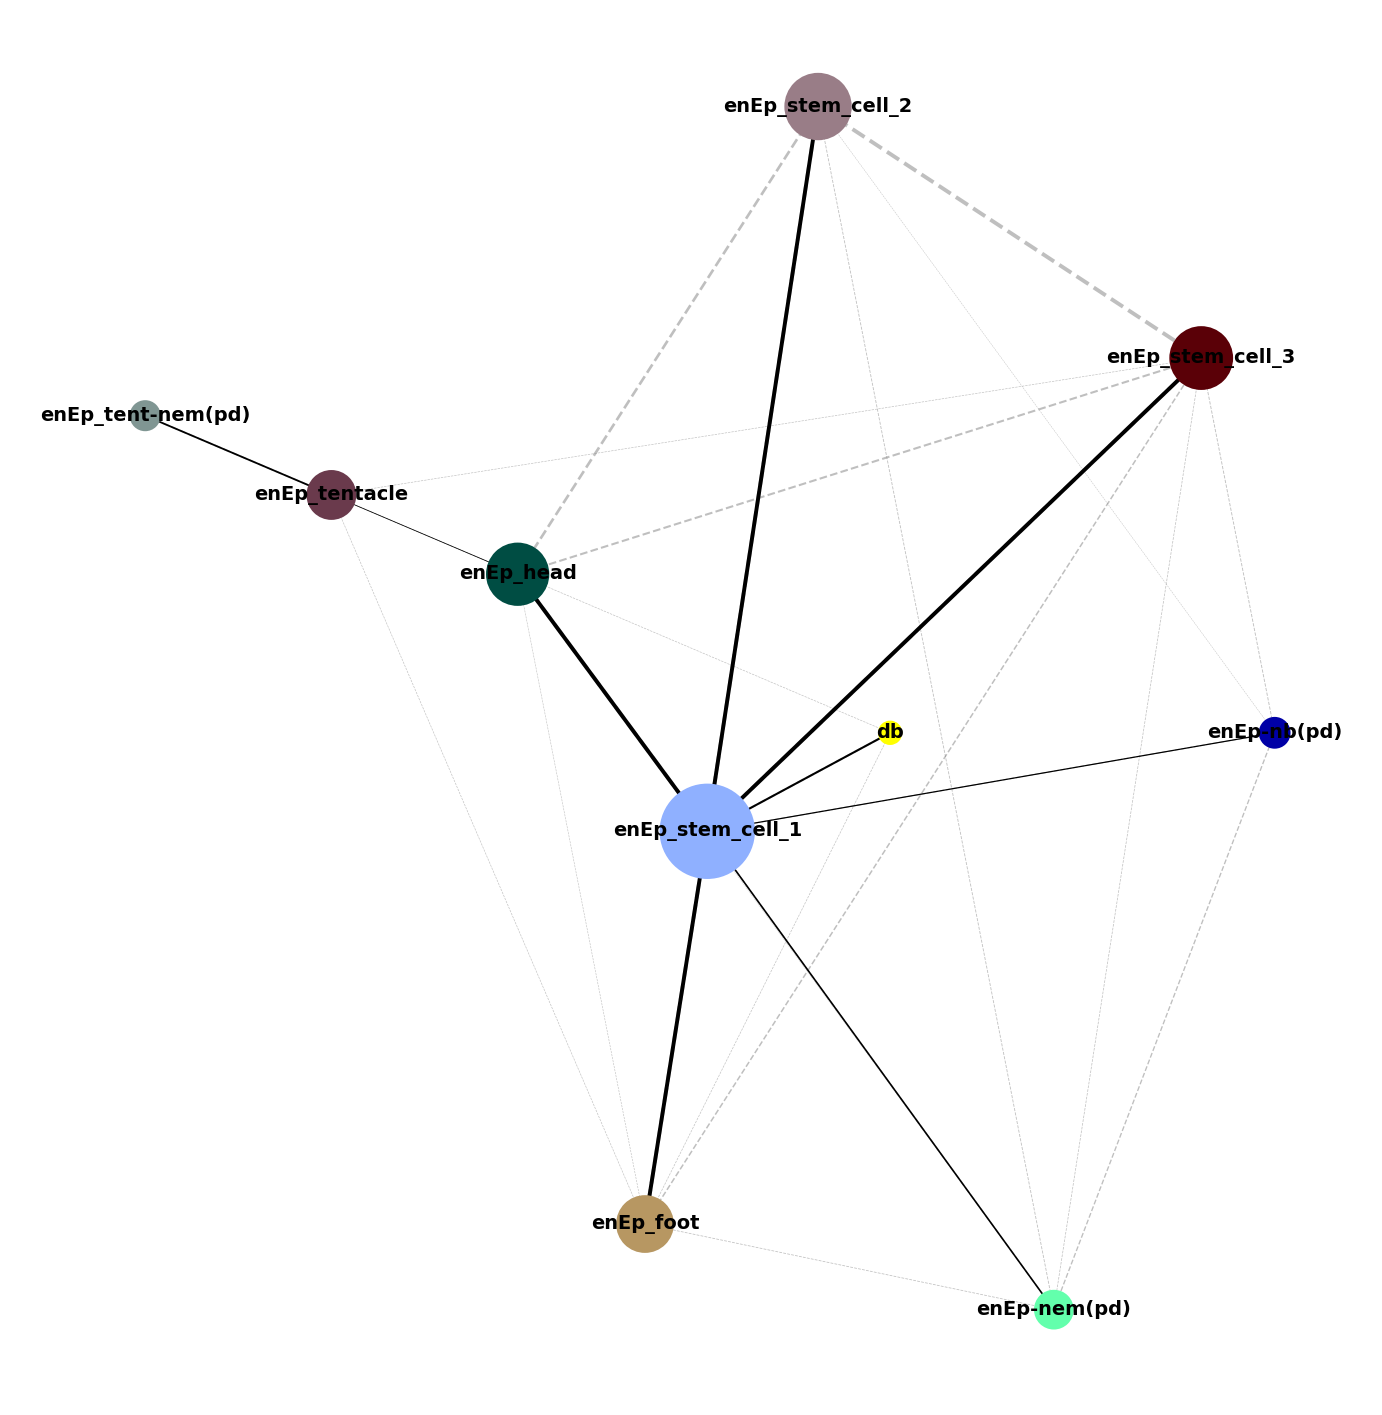

In [234]:
adata_en=adata[adata.obs["lineages"]=='endoderm']
sc.pp.neighbors(adata_en, n_neighbors=10)
sc.tl.paga(adata_en, groups='cluster.long.portal', model='v1.0')
sc.pl.paga(adata_en,
    threshold=0.01,           
    solid_edges='connectivities_tree',
    dashed_edges='connectivities', 

    layout='rt_circular',
    node_size_scale=0.5,
    node_size_power=0.9,
    edge_width_scale=1,
    max_edge_width=0.7,
    fontsize=3.5,save="endoderm.pdf")

In [235]:
adata.write("hydra_paga.h5ad",compression="gzip")

... storing 'lineages' as categorical
